In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#아이리스 데이터를 불러옵니다.
df = pd.read_csv('c:/data/data/iris3.csv')

In [3]:
# df.iloc[:5,:]
# df.iloc[:50, :]
# df.iloc[50:100, :]
# df.iloc[100:, :]


In [4]:
## 추가
## y값에 따라서 회귀, 이항분류 시그모이드, 이항분류이상의 소프트맥스
## y값이 3개의 카테고리 중 한개를 선택하는 다항분류임으로
## Dense 층의 가장 하단(최우측)의  output은 Dense(3, activation='softmax')
## model.compile(loss='categorical_crossentropy')
## ================================================> y값이 원핫인코딩 되어 있어야함
## ================================================> y값이 숫자이지만 원핫인코딩이 안되어 있다면
##                                model.compile(loss='sparse_categorical_crossentropy')

df.iloc[:,4].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [5]:
## 머신러닝, 딥러닝의 데이터셋은 모두 숫자여야함.
## Null값 있으면 안됨
X=df.iloc[:, :4] 
y=df.iloc[:,4]

# y값은 문자이면 안됨.
# 텐서플로우 작업에서는 y값을 레벨인코딩 까지만 해도 됨
# loss에서 원핫인코딩해라 라고 정의할수 있음.

y=pd.get_dummies(y)
y[:3]

,Iris-setosa,Iris-versicolor,Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False


In [6]:


# X_train, X_test, y_train, y_test 의 순서에 유의해주세요
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=777)  # 150 개중 *75%는  train.

len(X_train),len(X_test)


(112, 38)

In [7]:
inNum=np.shape(X)[1]

In [19]:
# 모델 설정
model = Sequential()
model.add(Dense(12,  input_dim=4, activation='relu')) # x값이4개 w(4)+b(1)=5개파람 *  12개=>60개
model.add(Dense(8,  activation='relu'))  # x값이 12개  w(12)+b(1)=13개파람 * 8개=104개
model.add(Dense(3, activation='softmax')) # x값이 8개 w(8)+b(1)=9개파람 * 3개=27개
model.summary()

# 모델 컴파일
hist=model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 에포크 당 w,b를 레이어층에 맞추어서 저장
# modelpath는 폴더 없으면 생성됨

modelpath="c:/data/model/iris/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=0) # 기본 값이 0임

# 모델 실행
# 전체112개(150개중75%의)의 데이터셋, 배치5 총 (112/5)=> 23회의 배치작업이 이루어짐. 배치23회*에포크80회=총 1840회의 optimizer='adam'작업이 이루어짐
# 배치에서는 w,b갱신만하고 총배치가 다끝나는 1에포크에서 생성된 w,b값을  validation_data에 넣어서 확인함
history=model.fit(X_train, y_train, 
                    epochs=80, 
                    batch_size=5,
                    verbose=0,             # 기본 값이 1임
                    validation_data=(X_test, y_test),
                    callbacks=[checkpointer])  

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                60        
                                                                 
 dense_7 (Dense)             (None, 8)                 104       
                                                                 
 dense_8 (Dense)             (None, 3)                 27        
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


## 모델 시각화
 - history=model.fit 실행한 명령어에 epoch당 loss, accuracy가 history에 기억되어 있음

In [16]:
# history에 저장된 학습 결과를 확인해 보겠습니다. 
hist_df=pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.931416,0.517857,0.897734,0.631579
1,0.861494,0.660714,0.833178,0.657895
2,0.801282,0.669643,0.777432,0.684211
3,0.749217,0.687500,0.730830,0.710526
4,0.707790,0.750000,0.691047,0.763158
...,...,...,...,...
75,0.094372,0.982143,0.153740,0.947368
76,0.091555,0.982143,0.149227,0.973684
77,0.088414,0.982143,0.146130,0.973684
78,0.088233,0.982143,0.150746,0.947368


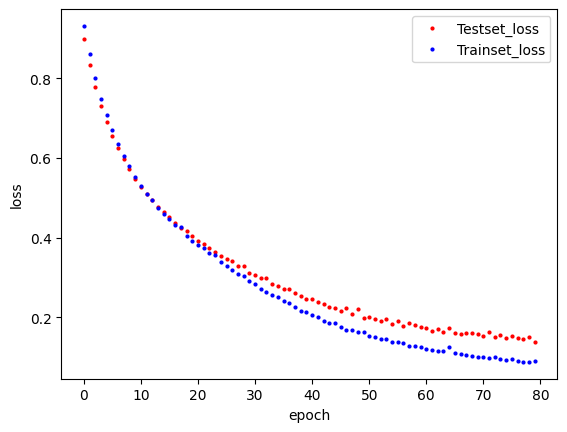

In [17]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss=hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss=hist_df['loss']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

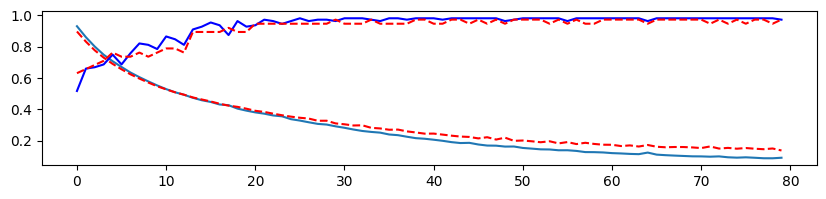

In [18]:
list(history.history)



plt.figure(figsize=(10,2))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],'r--')

plt.plot(history.history['accuracy'],'b')
plt.plot(history.history['val_accuracy'],'r--')

In [ ]:
# history에 저장된 학습 결과를 확인해 보겠습니다. 
hist_df=pd.DataFrame(history.history)
hist_df

## 모델의 정확도

In [10]:
# model.fit할 때, validation을 test로 사용했으므로, model.fit의 최종과 같은 값이 출력
score = model.evaluate(X_test, y_test)
score # 0번은 loss, 1번은 accuracy

2/2 [==============================] - 0s 3ms/step - loss: 0.1252 - accuracy: 0.9737


[0.12521469593048096, 0.9736841917037964]

In [11]:
#df.head()
newX=[5.2,3.2,1.5,0.3]

X_train[:3].values

input_newX=np.reshape(newX, (1,-1))
result=model.predict(input_newX) # 3개의 카테고리의 확률값으로 출력이 되고, 다 합치면 1이 됨. 가장 큰 값을 갖고 있는 위치값을 찾아내면 됨
result_num=np.argmax(result)
result_num

0

In [20]:
class_names=y_train.columns
class_names[result_num]

'Iris-setosa'

## 모델 검증
 - 교차검증 모델로 보통 사용함.
 - 필수는 아님

In [29]:
len(X_test)
# y_test.iloc[0]
y_test.values[0]

array([False,  True, False])

In [31]:
model.predict(X_test)[:5]

array([[8.2525238e-03, 9.7676021e-01, 1.4987283e-02],
       [2.0504398e-03, 9.3811494e-01, 5.9834637e-02],
       [2.7913509e-03, 8.3073848e-01, 1.6647020e-01],
       [7.8448196e-05, 1.6130129e-01, 8.3862031e-01],
       [9.8931611e-01, 1.0682819e-02, 1.1144393e-06]], dtype=float32)

In [33]:
np.argmax(model.predict(X_test), axis=1)[:5]

array([1, 1, 1, 2, 0], dtype=int64)

In [34]:
y_test[:5]

,Iris-setosa,Iris-versicolor,Iris-virginica
71,False,True,False
86,False,True,False
90,False,True,False
83,False,True,False
6,True,False,False


In [38]:
# what is axis
a=np.array([[1,2],
            [2,3],
            [3,4]])
a.sum(), a.sum(axis=1), a.sum(axis=0)

(15, array([3, 5, 7]), array([6, 9]))

In [47]:
pred_iris=np.argmax(model.predict(X_test), axis=1)
real_iris=np.argmax(y_test, axis=1)
pred_iris[:5], real_iris[:5]

resultDf=pd.DataFrame({'real':real_iris, 'pred':pred_iris, 'ox':real_iris==pred_iris})
resultDf[:5]

,real,pred,ox
0,1,1,True
1,1,1,True
2,1,1,True
3,1,2,False
4,0,0,True


In [ ]:
# 예측 값과 실제 값, 실행 번호가 들어갈 빈 리스트를 만듭니다.
real_prices =[]
pred_prices = []
X_num = []

# 25개의 샘플을 뽑아 실제 값, 예측 값을 출력해 봅니다. 
n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(25):
    real = y_test[i]
    prediction = Y_prediction[i]
    print("실제가격: {:.2f}, 예상가격: {:.2f}".format(real, prediction))
    real_prices.append(real)
    pred_prices.append(prediction)
    n_iter = n_iter + 1
    X_num.append(n_iter)

## Learning 자동 중단

In [ ]:
# # 학습이 언제 자동 중단 될지를 설정합니다.
# early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

# #최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
# modelpath="./data/model/Ch14-4-bestmodel.hdf5"

# # 최적화 모델을 업데이트하고 저장합니다.
# checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

# #모델을 실행합니다.
# history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback,checkpointer])
